In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import textwrap
import folium
from folium import plugins
%matplotlib inline

In [207]:
survey_raw_df = pd.read_csv('survey_results_public.csv')
survey_raw_df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [208]:
survey_raw_df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [209]:
survey_raw_df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [210]:
schema_df_raw = pd.read_csv('survey_results_schema.csv')

schema_df = schema_df_raw[['qname','question']]
schema_df = schema_df.set_index('qname')
schema_df.index = schema_df.index.astype(str)
schema_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, S0 to Frequency_3
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  78 non-null     object
dtypes: object(1)
memory usage: 1.2+ KB


In [211]:
mask = schema_df.index.str.contains('S[0-7]',case=False)
filtered_df = schema_df[~mask]
filtered_df

,question
qname,
MetaInfo,Browser Meta Info
Q310,"<div><span style=""font-size:19px;""><strong>You..."
Q120,
MainBranch,Which of the following options best describes ...
Age,What is your age? *
...,...
Knowledge_7,Waiting on answers to questions often causes i...
Knowledge_8,I feel like I have the tools and/or resources ...
Frequency_1,Needing help from people outside of your immed...


In [212]:
survey_raw_df.Age.unique()

array(['18-24 years old', '25-34 years old', '45-54 years old',
       '35-44 years old', 'Under 18 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [213]:
age_counts = survey_raw_df.Age.value_counts().reset_index(name='Count')
age_counts

,Age,Count
0,25-34 years old,33247
1,35-44 years old,20532
2,18-24 years old,17931
3,45-54 years old,8334
4,Under 18 years old,4128
5,55-64 years old,3392
6,65 years or older,1171
7,Prefer not to say,449


In [214]:
age_sectors = {}
for age_group, count in zip(age_counts['Age'], age_counts['Count']):
    # Extract rows for the current age group
    age_sector_df = survey_raw_df[survey_raw_df['Age'] == age_group]
    
    # Store the age sector DataFrame in the dictionary
    age_sectors[age_group] = age_sector_df
    
age_18_24_df = age_sectors.get('18-24 years old',pd.DataFrame())


age_18_24_df.shape

(17931, 84)

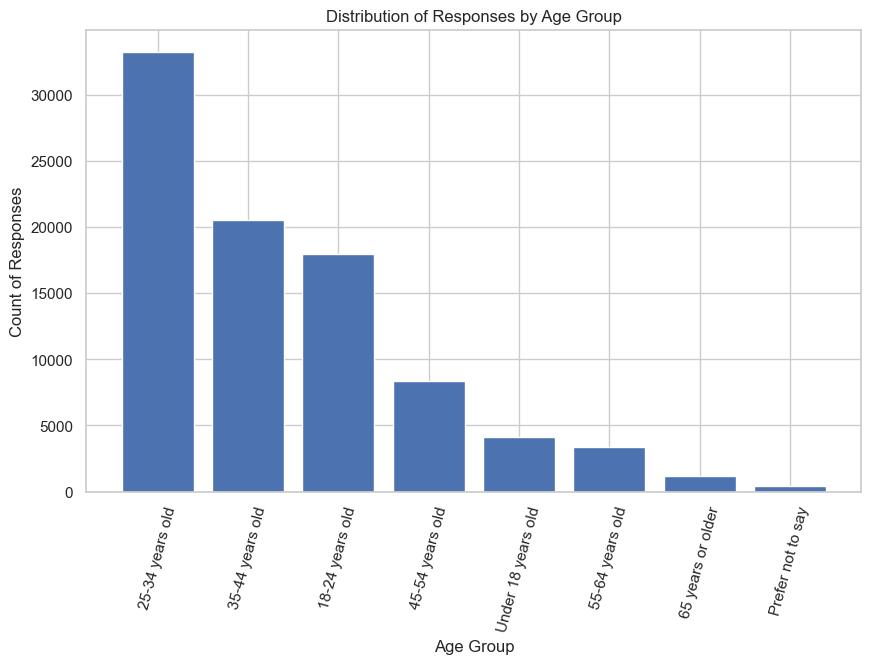

In [215]:
plt.figure(figsize=(10, 6))
plt.bar(age_counts['Age'], age_counts['Count'])
plt.title('Distribution of Responses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Responses')
plt.xticks(rotation=75)
plt.show()

In [216]:
survey_raw_df.Country.count()

87973

In [217]:
top_countries_submissions = survey_raw_df.Country.value_counts().head(10)
top_countries_submissions

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Name: count, dtype: int64

In [218]:
country_counts = survey_raw_df['Country'].value_counts().reset_index(name='Submissions')
country_counts
head_country_counts = country_counts.head(15)
country_counts


,Country,Submissions
0,United States of America,18647
1,Germany,7328
2,India,5625
3,United Kingdom of Great Britain and Northern I...,5552
4,Canada,3507
...,...,...
180,Saint Kitts and Nevis,1
181,Marshall Islands,1
182,Samoa,1
183,Central African Republic,1


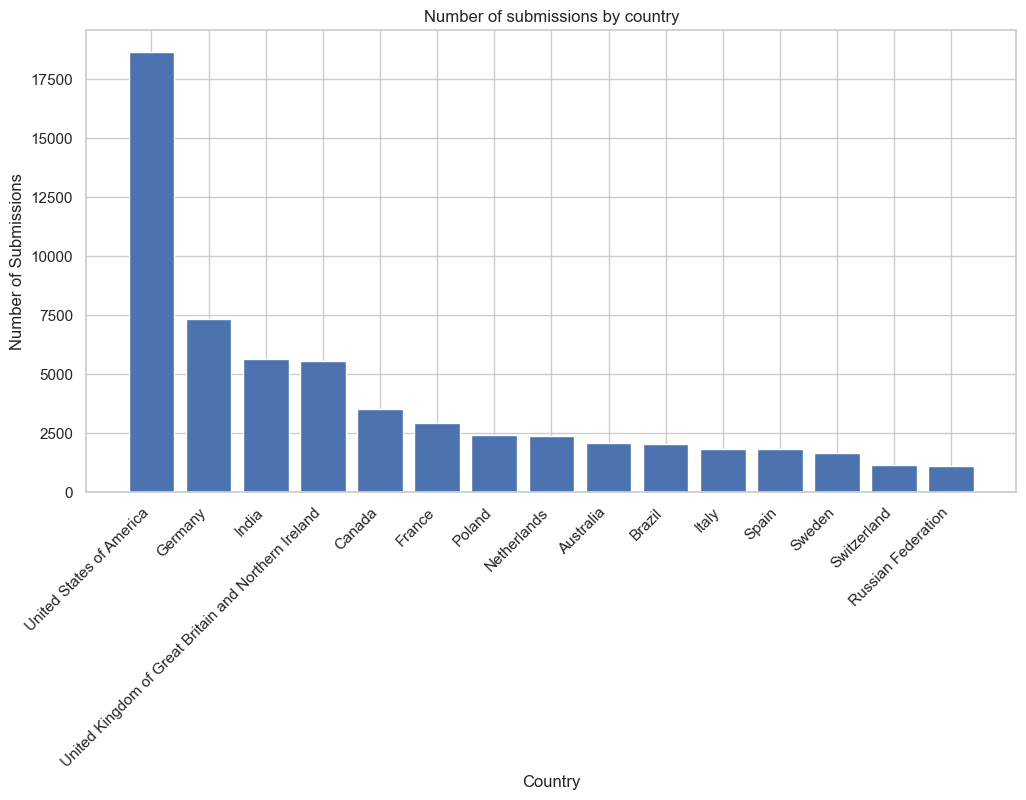

In [219]:
plt.figure(figsize=(12,6))
plt.bar(head_country_counts.Country,head_country_counts.Submissions)
plt.title('Number of submissions by country')
plt.xlabel('Country')
plt.ylabel('Number of Submissions')

plt.xticks(rotation=45,ha='right')
plt.show()

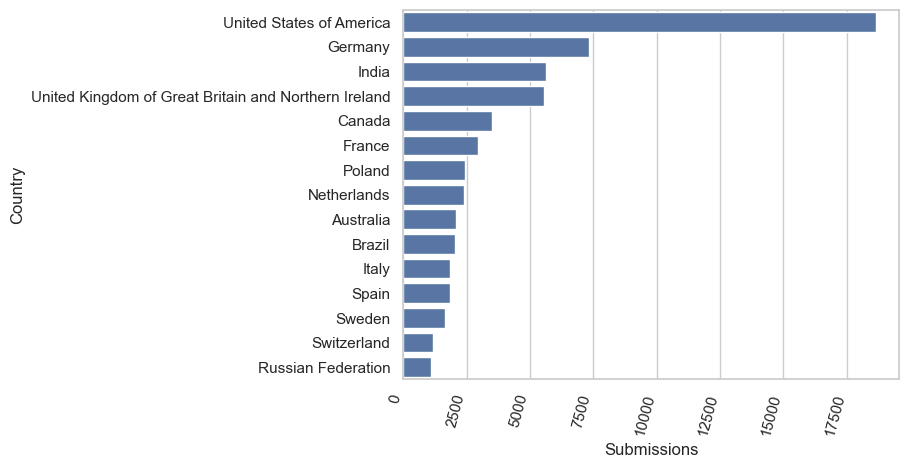

In [259]:

sns.barplot(x='Submissions',y='Country',data=head_country_counts);
plt.xticks(rotation=75,ha='right');


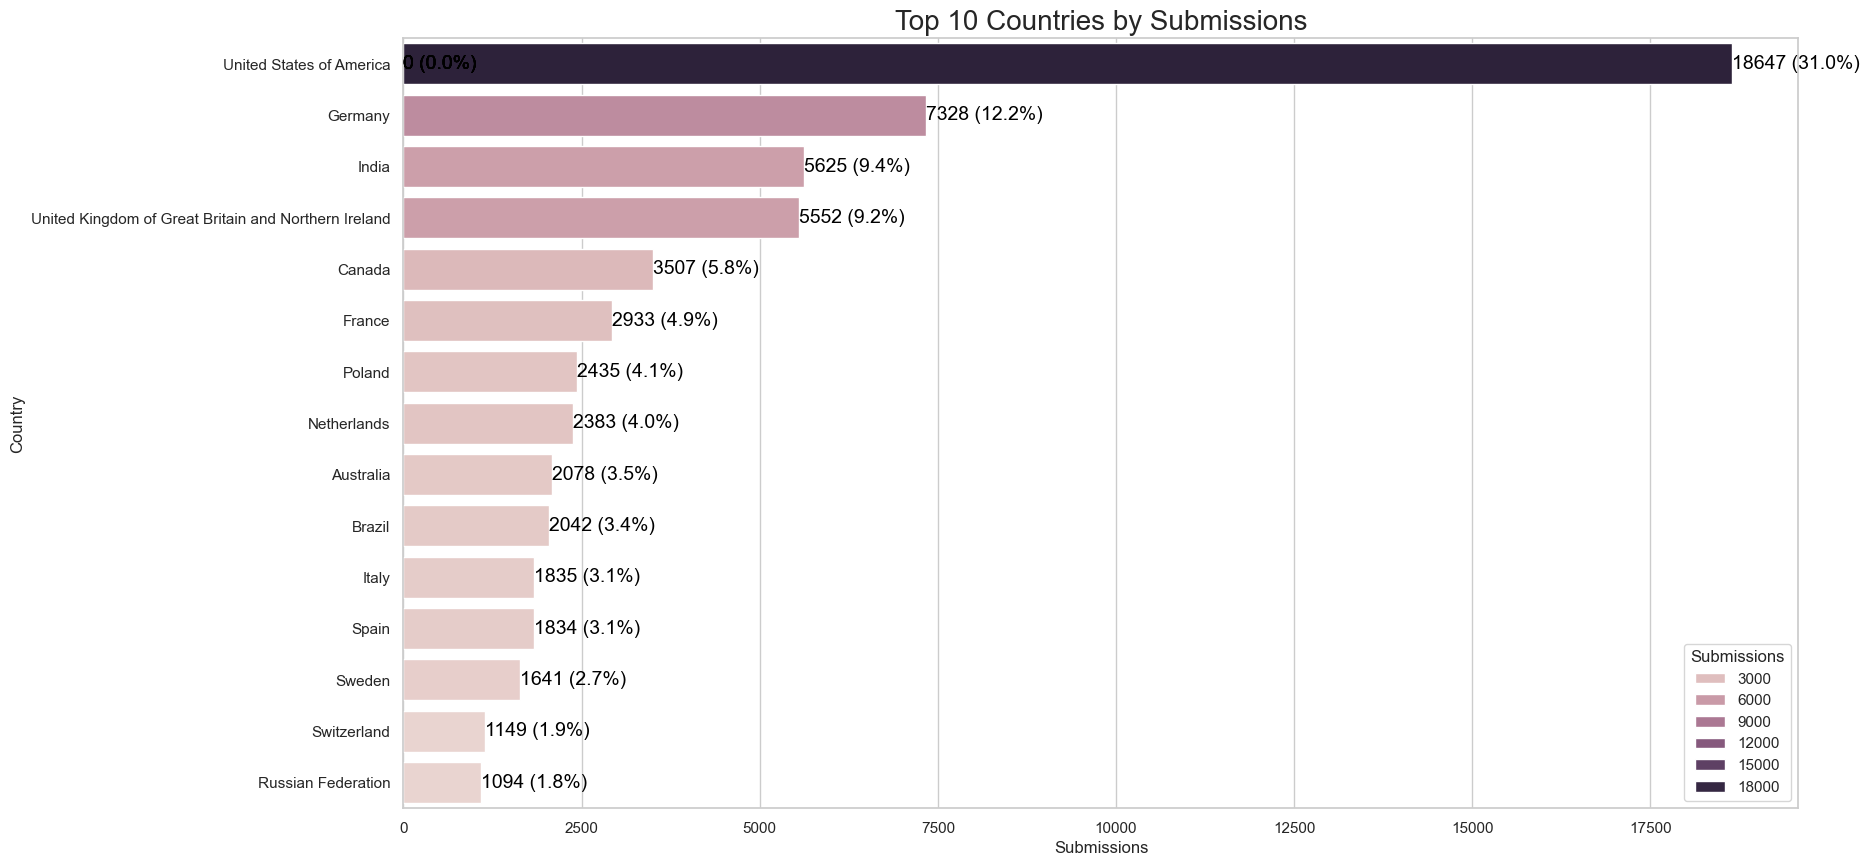

In [275]:
sns.set(style="whitegrid")
plt.figure(figsize=(18,10))

# Create a horizontal bar plot
ax = sns.barplot(x='Submissions', y='Country', data=head_country_counts,hue='Submissions')

# Display both the number and percentage at the end of each bar
total_submissions = head_country_counts['Submissions'].sum()

for p in ax.patches:
    count = int(p.get_width())
    percentage = f'{100 * count / total_submissions:.1f}%'
    
    x = p.get_width() + 0.02  # Adjust the position for better visibility
    y = p.get_y() + p.get_height() / 2
    
    ax.annotate(f'{count} ({percentage})', (x, y), ha='left', va='center', fontsize=14, color='black')

# Set plot title
plt.title('Top 10 Countries by Submissions',fontsize=20)
# Show the plot
plt.show()


In [221]:
country_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      185 non-null    object
 1   Submissions  185 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [222]:
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [223]:

country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df.at[3, 'Country'] = 'United Kingdom'
country_counts_df.at[12, 'Country'] = 'Russia'

country_counts_df.describe()

,Count
count,185.000000
mean,475.529730
std,1632.132807
min,1.000000
25%,9.000000
50%,53.000000
75%,317.000000
max,18647.000000


In [224]:
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    # threshold_scale=[1,10,50,100,500,1_000,5_000,10_000,15_000,20_000],
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)
# the thershold scale is used to color the countries based on the scale ranges given the data has
# to be in that range if it doesnt fit into the range then the map doesnt work
# it is better to let the folium to automatically determine the bin edges on the range of your actual data
m

In [225]:
filtered_df = survey_raw_df.EdLevel.dropna()
filtered_df

1             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
2             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
3             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
4             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
5        Some college/university study without earning ...
                               ...                        
89179                  Associate degree (A.A., A.S., etc.)
89180         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
89181                                       Something else
89182    Secondary school (e.g. American high school, G...
89183         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Name: EdLevel, Length: 87973, dtype: object

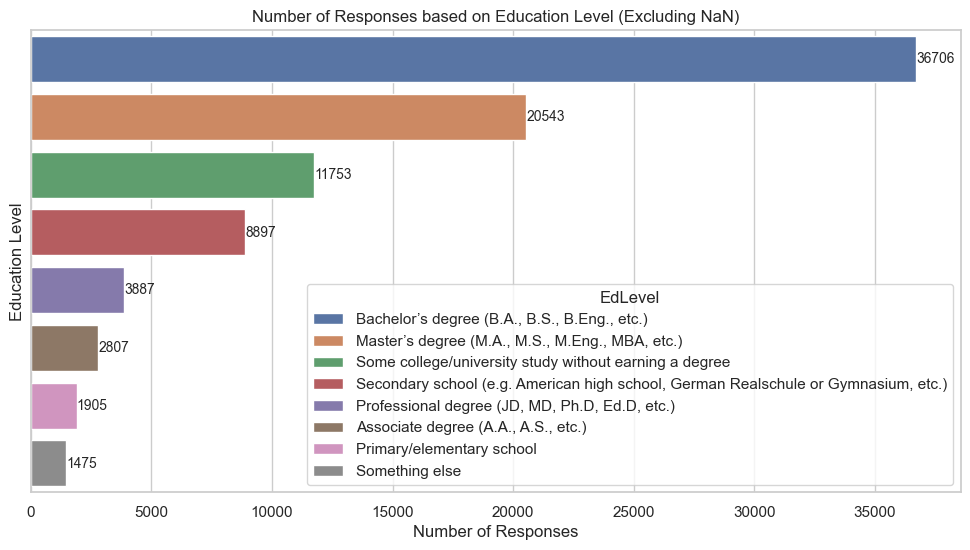

In [226]:

filtered_df = survey_raw_df.dropna(subset=['EdLevel'])
edlevel_counts = filtered_df['EdLevel'].value_counts()
edlevel_labels = edlevel_counts.index.astype(str)
wrapped_labels = [textwrap.fill(label, width=20) for label in edlevel_labels]

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=edlevel_counts.values, y=wrapped_labels, hue=edlevel_labels)

# Set labels and title
plt.xlabel('Number of Responses')
plt.ylabel('Education Level')  # Empty string for y-axis label
plt.title('Number of Responses based on Education Level (Excluding NaN)')

# Hide numeric tick labels on the y-axis
plt.yticks([])

for index,value in enumerate(edlevel_counts.values):
    ax.text(value,index,f'{value}',ha='left',va='center',fontsize=10)

plt.show()


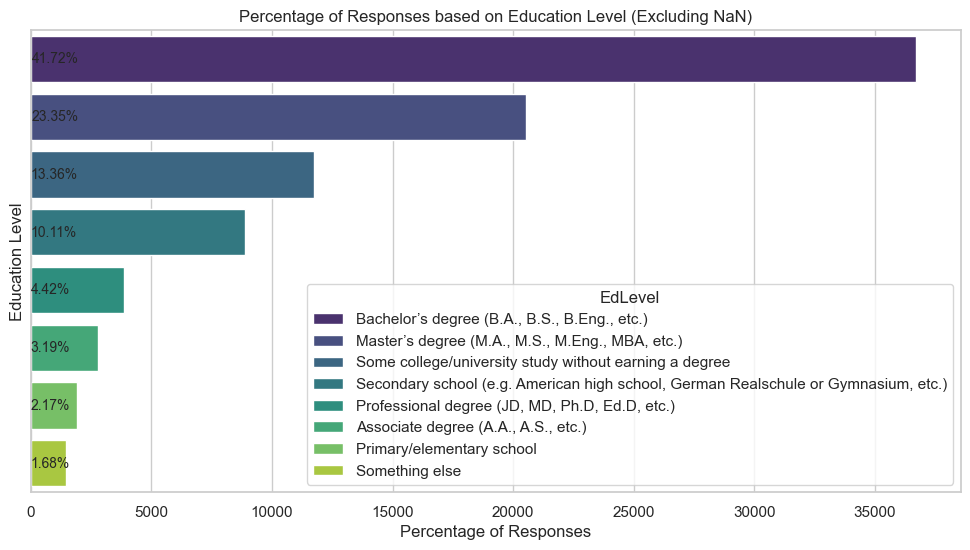

In [227]:
percentage_values = (edlevel_counts / len(filtered_df)) * 100
edlevel_labels = edlevel_counts.index.astype(str)
# wrapped_labels = [textwrap.fill(label, width=20) for label in edlevel_labels]

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=edlevel_counts.values, y=wrapped_labels, hue=edlevel_labels, palette='viridis', dodge=False)

# Set labels and title
plt.xlabel('Percentage of Responses')
plt.ylabel('Education Level')  # Empty string for y-axis label
plt.title('Percentage of Responses based on Education Level (Excluding NaN)')

# Hide numeric tick labels on the y-axis
plt.yticks([])

for index, value in enumerate(percentage_values.values):
    ax.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=10)

plt.show()


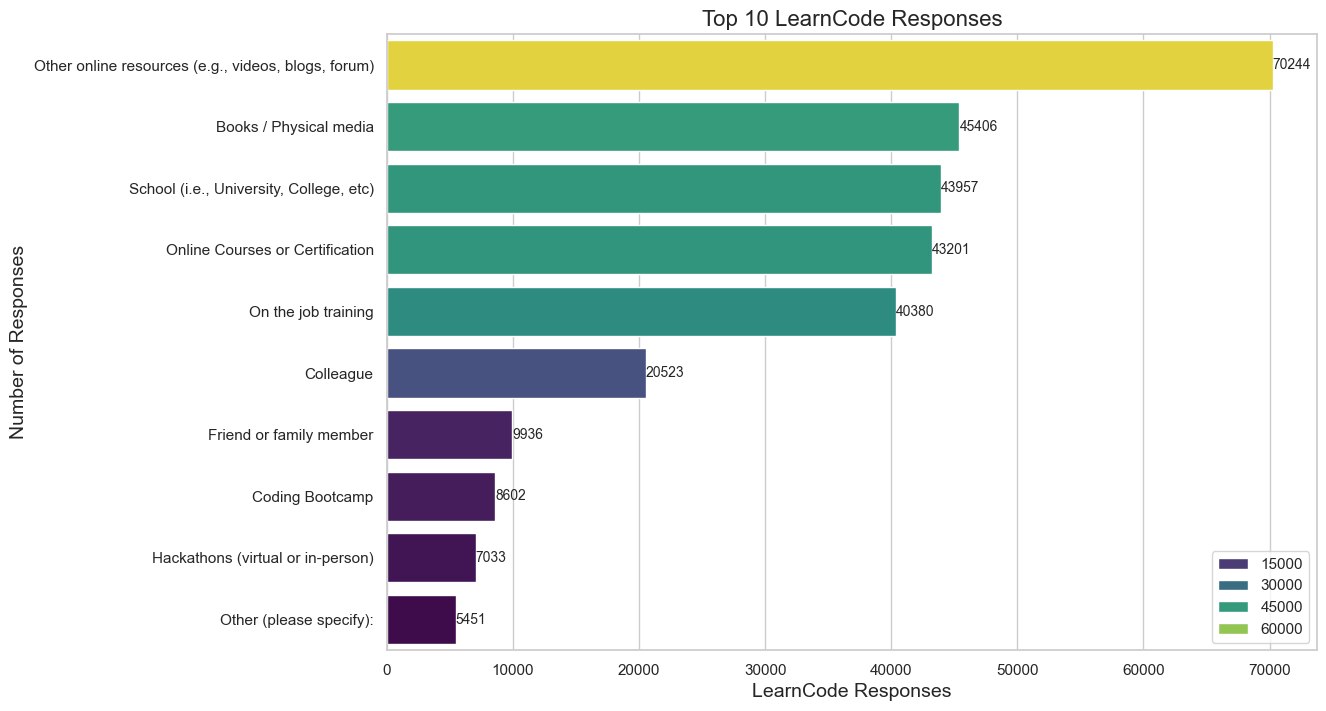

In [228]:
learn_code_data = survey_raw_df['LearnCode']

# Split the values in the column if users have selected multiple options
learn_code_data = learn_code_data.str.split(';').explode()

# Count the occurrences of each response
learn_code_counts = learn_code_data.value_counts().head(10)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the top ten responses using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=learn_code_counts.values, y=learn_code_counts.index,palette='viridis', hue=learn_code_counts.values)
ax.set_title('Top 10 LearnCode Responses', fontsize=16)
ax.set_xlabel('LearnCode Responses', fontsize=14)
ax.set_ylabel('Number of Responses', fontsize=14)
# ax.tick_params(axis='x', rotation=75, ha='right', labelsize=12)
# ax.tick_params(axis='y', labelsize=12)

# Display the count on top of each bar
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
#                 textcoords='offset points')
# plt.xticks(rotation=75
for index,value in enumerate(learn_code_counts.values):
    ax.text(value,index,f'{value}',ha='left',va='center',fontsize=10)
plt.show()

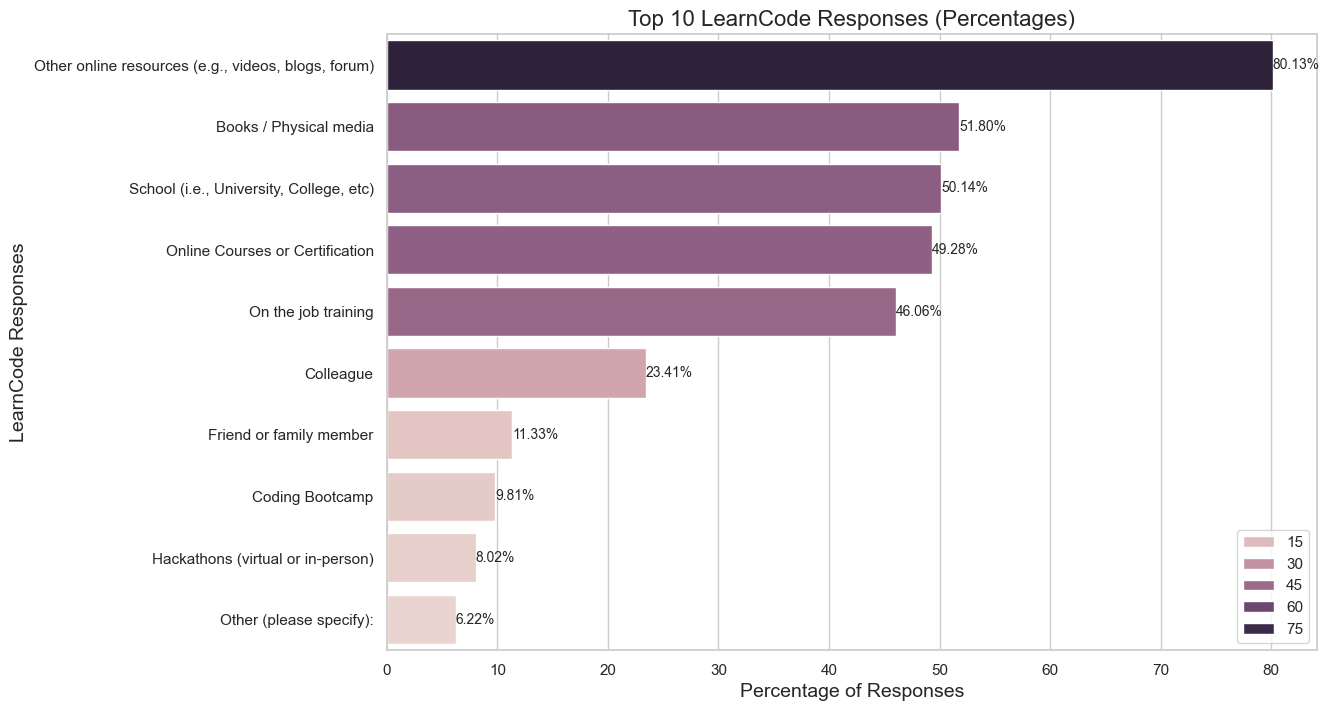

In [229]:
learn_code_data = survey_raw_df['LearnCode']

learn_code_data = learn_code_data.dropna().str.split(';').explode()

top_10_learn_code_data = learn_code_data.value_counts().head(10)

total_learncode_responses = survey_raw_df.LearnCode.dropna()
total_responses = len(total_learncode_responses)
learn_code_percentages = (top_10_learn_code_data / total_responses) * 100

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=learn_code_percentages.values, y=learn_code_percentages.index, hue=learn_code_percentages.values)
ax.set_title('Top 10 LearnCode Responses (Percentages)', fontsize=16)
ax.set_xlabel('Percentage of Responses', fontsize=14)
ax.set_ylabel('LearnCode Responses', fontsize=14)
# sns.color_palette('rocket',as_cmap=True)
# Display the percentage on top of each bar
for index, value in enumerate(learn_code_percentages.values):
    ax.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=10)

plt.show()


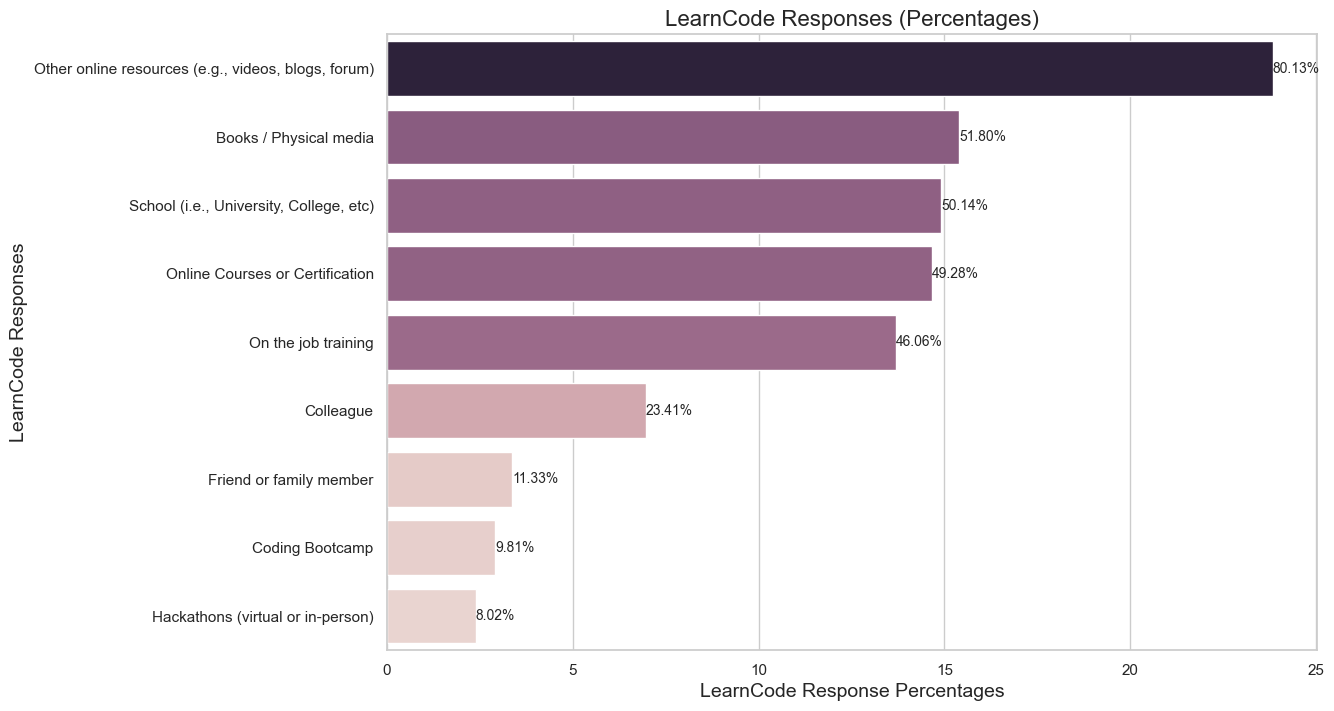

In [230]:

learn_code_data = survey_raw_df['LearnCode']

# Split the values in the column if users have selected multiple options
learn_code_data = learn_code_data.dropna().str.split(';').explode()

# Calculate percentages based on the total number of responses
total_responses = len(learn_code_data)
learn_code_percentages = (learn_code_data.value_counts() / total_responses) * 100

# Define the expected results
expected_results = {
    'Other online resources (e.g., videos, blogs, forum)': 80.13,
    'Books / Physical media': 51.8,
    'School (i.e., University, College, etc)': 50.14,
    'Online Courses or Certification': 49.28,
    'On the job training': 46.06,
    'Colleague': 23.41,
    'Friend or family member': 11.33,
    'Coding Bootcamp': 9.81,
    'Hackathons (virtual or in-person)': 8.02
}

# Sort the results according to the provided percentages
sorted_learn_code_percentages = learn_code_percentages.loc[expected_results.keys()].sort_values(ascending=False)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the top responses using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=sorted_learn_code_percentages.values, y=sorted_learn_code_percentages.index, hue=sorted_learn_code_percentages.values,legend=False)
ax.set_title('LearnCode Responses (Percentages)', fontsize=16)
ax.set_xlabel('LearnCode Response Percentages', fontsize=14)
ax.set_ylabel('LearnCode Responses', fontsize=14)

# Display the expected percentages on top of each bar
for index, value in enumerate(sorted_learn_code_percentages.values):
    expected_percentage = expected_results[sorted_learn_code_percentages.index[index]]
    ax.text(value, index, f'{expected_percentage:.2f}%', ha='left', va='center', fontsize=10)

plt.show()


In [231]:
years_code_data = survey_raw_df.YearsCode.dropna()
top_10_years_code_data = years_code_data.value_counts()
top_10_years_code_data

YearsCode
10                    6521
5                     5415
6                     4893
8                     4879
7                     4800
4                     4466
15                    4336
3                     4269
20                    4021
12                    3471
9                     3130
2                     2826
25                    2685
13                    2601
11                    2519
14                    2278
30                    2078
16                    1842
18                    1690
17                    1544
23                    1327
40                    1302
1                     1294
22                    1210
35                    1118
Less than 1 year       968
24                     959
19                     826
21                     761
28                     715
27                     710
26                     706
33                     496
32                     444
38                     428
45                     360
More than 50 years

In [232]:
survey_raw_df['YearsCode'] = survey_raw_df['YearsCode'].replace({"Less than 1 year": 0.5, "More than 50 years": 52})

# Drop NaN values from the 'YearsCode' column
survey_raw_df = survey_raw_df[survey_raw_df['YearsCode'].notna()];


In [233]:
survey_raw_df.YearsCode.sample(10)

63094    14
2898     13
5936     37
65712    30
87841     4
37747     9
30368    13
19024     4
74331     4
13446    11
Name: YearsCode, dtype: object

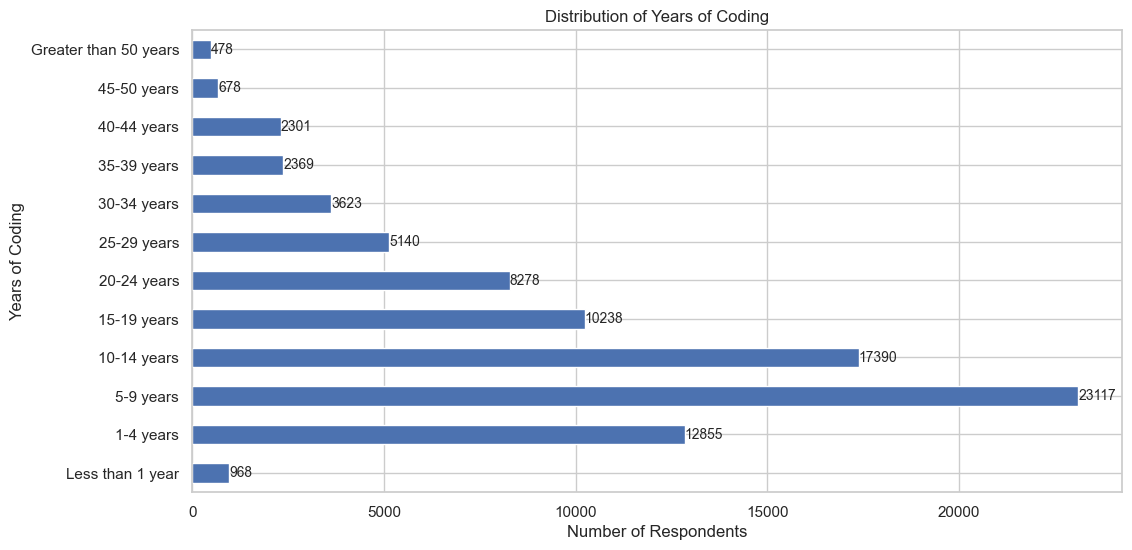

In [234]:
survey_raw_df.loc[:, 'YearsCode'] = pd.to_numeric(survey_raw_df['YearsCode'], errors='coerce')

# Create age groups
bins = [0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, float('inf')]
labels = ['Less than 1 year', '1-4 years', '5-9 years', '10-14 years', '15-19 years', '20-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years', '45-50 years', 'Greater than 50 years']

# Group by 'AgeGroup' and sum the counts for each group
grouped_data = survey_raw_df.loc[:, 'AgeGroup'] = pd.cut(survey_raw_df['YearsCode'], bins=bins, labels=labels, right=False).value_counts().reindex(labels, fill_value=0)

# Plot the results with annotations
plt.figure(figsize=(12, 6))
ax = grouped_data.plot.barh()

# Annotate each bar with the number of responses
for index, value in enumerate(grouped_data):
    ax.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.xlabel('Number of Respondents')
plt.ylabel('Years of Coding')
plt.title('Distribution of Years of Coding')
plt.show()

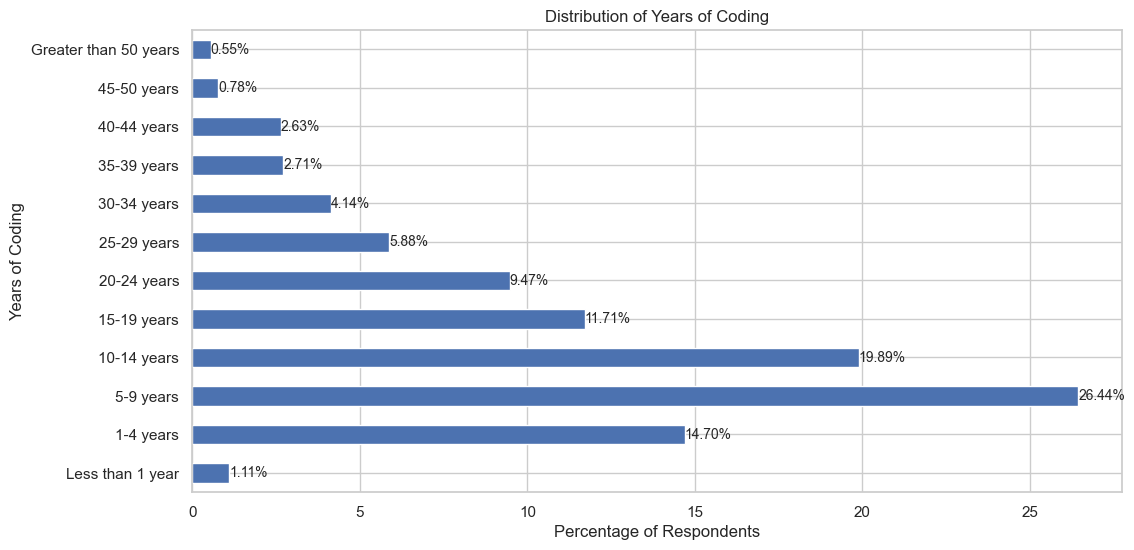

In [235]:
survey_raw_df.loc[:, 'YearsCode'] = pd.to_numeric(survey_raw_df['YearsCode'], errors='coerce')

# Create age groups
bins = [0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, float('inf')]
labels = ['Less than 1 year', '1-4 years', '5-9 years', '10-14 years', '15-19 years', '20-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years', '45-50 years', 'Greater than 50 years']

# Group by 'AgeGroup' and calculate the percentage for each group
grouped_data = survey_raw_df.loc[:, 'AgeGroup'] = pd.cut(survey_raw_df['YearsCode'], bins=bins, labels=labels, right=False).value_counts(normalize=True).reindex(labels, fill_value=0) * 100

# Plot the results with annotations
plt.figure(figsize=(12, 6))
ax = grouped_data.plot.barh()

# Annotate each bar with the percentage
for index, value in enumerate(grouped_data):
    ax.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=10)

plt.xlabel('Percentage of Respondents')
plt.ylabel('Years of Coding')
plt.title('Distribution of Years of Coding')
plt.show()

In [236]:
survey_raw_df.DevType.unique()

array(['Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'System administrator',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional', 'Educator',
       'Research & Development role', nan, 'Other (please specify):',
       'Developer, mobile', 'Database administrator',
       'Developer, embedded applications or devices', 'Student',
       'Engineer, data', 'Hardware Engineer', 'Product manager',
       'Academic researcher', 'Developer, game or graphics',
       'Cloud infrastructure engineer', 'Engineering manager',
       'Developer Experience', 'Project manager', 'DevOps specialist',
       'Engineer, site reliability', 'Blockchain', 'Developer Advocate',
       'Scientist', 'Marketing or sales professional'], dtype=object)

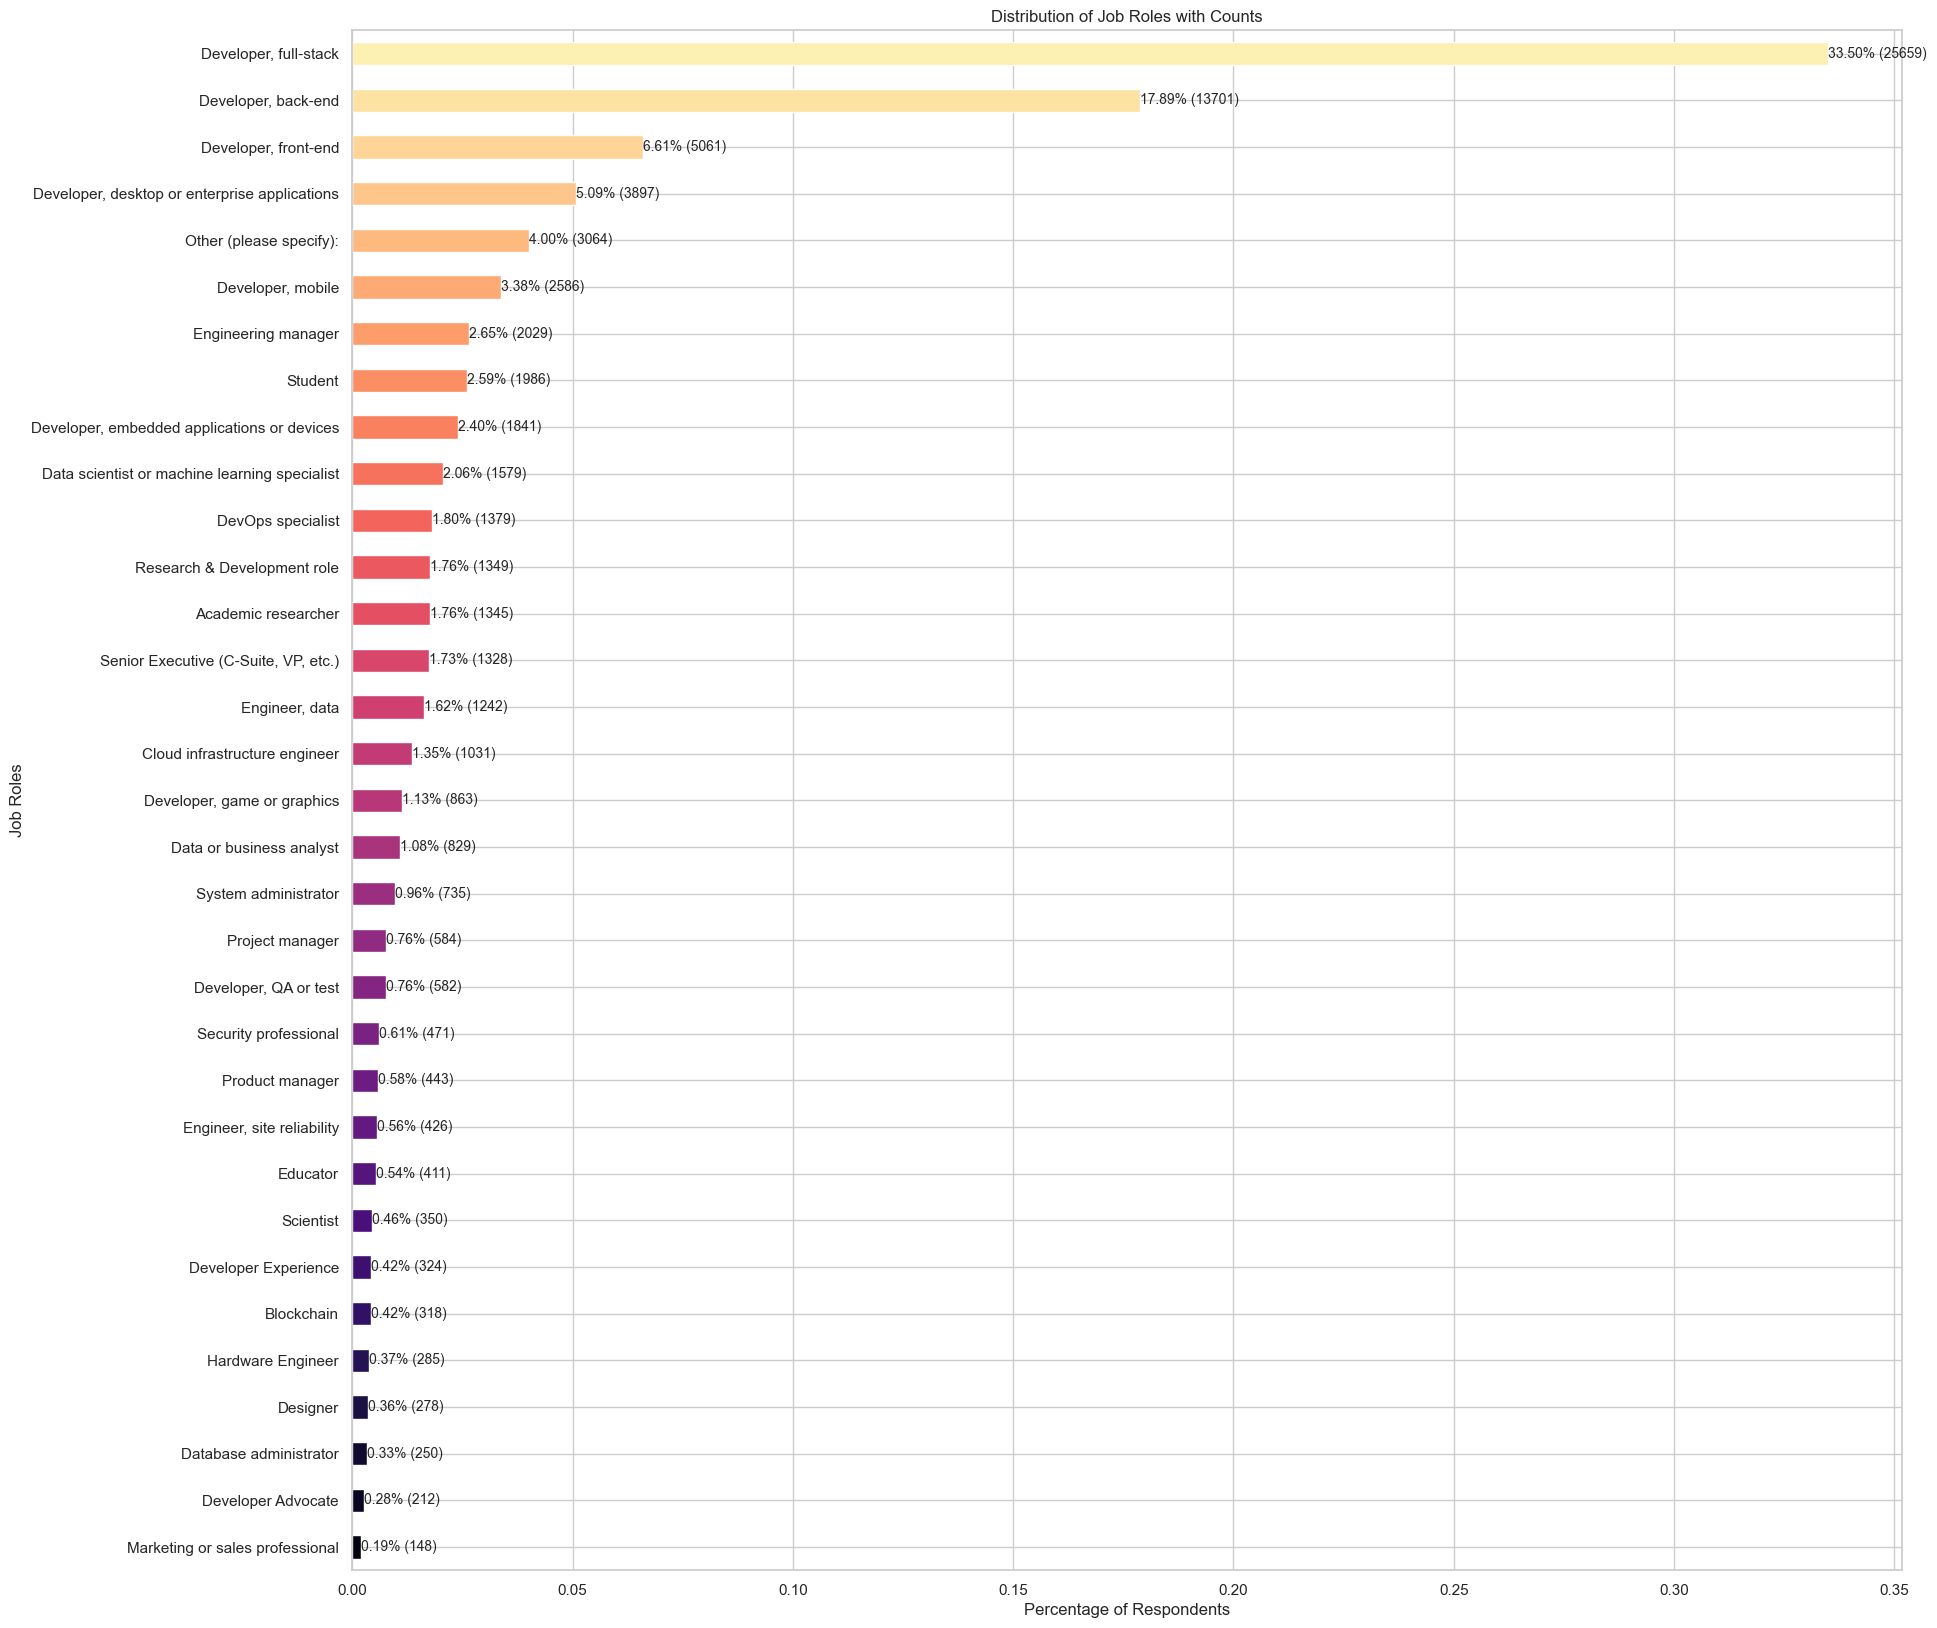

In [255]:
job_roles = survey_raw_df['DevType']

# Create labels for the job roles
role_labels = job_roles.value_counts().index

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the results with annotations for both percentages and counts
plt.figure(figsize=(20,20))
ax = job_roles.value_counts(normalize=True).reindex(role_labels, fill_value=0).sort_values().plot.barh(color=sns.color_palette('magma', len(role_labels)))

# Annotate each bar with the percentage
for index, (percent, count) in enumerate(zip(job_roles.value_counts(normalize=True).reindex(role_labels, fill_value=0).sort_values(), job_roles.value_counts().reindex(role_labels, fill_value=0).sort_values())):
    ax.text(percent, index, f'{percent*100:.2f}% ({count})', ha='left', va='center', fontsize=10)

plt.xlabel('Percentage of Respondents')
plt.ylabel('Job Roles')
plt.title('Distribution of Job Roles with Counts')

# Display a legend


plt.show()